<center> <h1> <span style="color:black"> IABE Data Science Certificate - Module 1 - Day 2  </h1> </center> 
<center> <h2> <span style="color:red"> Programming : (Generalized) Linear models </h1> </center>

# Agenda

* [Chapter 1 - Introduction](#one)
    + [1.1 Objective of the notebook](#one-one)
    + [1.2 Speakers](#one-two)
    + [1.3 IT requirements](#one-three)


* [Chapter 2 - Import of libraries and dataset](#two)
    + [2.1 Importing the libraries](#two-one)
    + [2.2 Importing the data](#two-two)
    
    
* [Chapter 3 - Linear Model on the Sales Prices](#three)
    + [3.1 Introduction](#three-one)
    + [3.2 Data preparation](#three-two)
    + [3.3 Description Analysis](#three-three)
    + [3.4 Split Training/Test Set](#three-four)
    + [3.5 Model Training](#three-five)

* [Chapter 4 - GLM on frequency](#four)
    + [4.1 Missing values filters](#four-one)
    + [4.2 Low dispersion ratio/high concentration filters](#four-two)
    
    


<br><br>

# Chapter 1 - Introduction <a name="one"></a>

## 1.1 Objective of the notebook <a name="one-one"></a>

The objectif of this notebook is to 
1. Explain how to run Linear and General Linear Models in Python
2. Perform some simple but useful tasks on the two datasets which were introduced during the first session such as
    - descriptive analysis
    - data manipulation
    - Trainig/Test split
3. Illustrate the adjustment of Linear models using the Sales Prices database
3. Illustrate the adjustment of General Linear models using the MTPL database

## 1.2 Speakers<a name="one-two"></a>

- Samuel Mahy

Samuel Mahy is director at Reacfin and head of the Non-Life Center of Excellence. He holds a Master of Engineering in Applied Mathematics and a Master of Actuarial Sciences both from the University of Louvain.

contact : samuel.mahy@reacfin.com

- Michael Lecuivre

Michael Lecuivre is senior consultant Non-Life at Reacfin. He holds a Master of Physics and a Master of Actuarial Sciences both from the University of Louvain.  

contact : michael.lecuivre@reacfin.com

## 1.3 IT requirements <a name="one-three"></a>

First, download the notebooks by clicking [here](https://gitfront.io/r/katrienantonio/a29071bdc7b2f20f24268be573ef54b68c65168c/IABE-DS-module-1/)



You then have two options to join the coding exercises covered during the computer labs.

**Google Colab - default!**

Google Colaboratory, or “Colab” for short, allows you to write and execute Python in your browser. Having a Google account you should be able to open the notebook and to run the python code cells. You can find [here](https://colab.research.google.com/drive/1xBHj08d1rj4C_IeMGXqwDz-sGGiis40F#scrollTo=rA-4zXBijbX3) a very simple notebook with some first exploratory steps of this research environment. You can store a copy of this notebook on your Google drive, or download a local copy.

To open the notebook you have downloaded from [here](https://gitfront.io/r/katrienantonio/a29071bdc7b2f20f24268be573ef54b68c65168c/IABE-DS-module-1/) just perform the following steps : 
1. go to Google Colab :  https://colab.research.google.com/notebooks/intro.ipynb 
2. click on **File>Upload notebook**. 

To execute the code in a code cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more.

In colab many python libraries are already available by default. If a library is missing it can be installed as explained [here](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb)

**Local installation - optional**

We recommend obtaining your local installation of Python via the distribution platform Anaconda. Here you should

- download Anaconda at https://www.anaconda.com/distribution/#download-section, select the version for Python 3.8 and make sure to pick the right operating system (top of the page: select Windows, macOS or Linux)

- install Anaconda; this is straightforward after launching the installer, but (in case you are in doubt) some instructions are at https://docs.anaconda.com/anaconda/install/windows/.

To open the notebook you have downloaded [here](https://gitfront.io/r/katrienantonio/a29071bdc7b2f20f24268be573ef54b68c65168c/IABE-DS-module-1/) simply

1. Launch Anaconda
2. Launch Jupiter Notebook from Anaconda main screen
3. Open the notebook file stored on your computer

In Anaconda many python libraries are already available by default. If a library is missing it can be installed by typing **pip install [library]** in the Anaconda command prompt. In order to be able to run this command you have to install **pip** from [here](https://pip.pypa.io/en/stable/installing/)

# Chapter 2 - Import of libraries and datasets <a name="two"></a>

In this chapter, we will explain how to load the required libraries and datasets
<br><br>

## 2.1 Importing the libraries<a name="two-one"></a>

First we make sure we are running an up to date version of Pyhton (at least 3.8)

In [2]:
import sys
print (sys.version)

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


In this first training we will use the **following libraries**: 

|Library | Definition                                                                             |
|----|---------------------------------------------------------------------------------|
| feature_engine | Contains functions related to feature engineering such as one hot encoding,...|
| matplotlib | Python 2D plotting library that contains many submodules like pyplot, a matlab-like interface	|
| math | Mathematical functions such as exponential, sine, etc. |
| numpy | Fundamental package for scientific computing. Numpy allows the user to integrate C/C++ and Fortran code to Python projects |
| pandas | Provides high-performance, easy-to-use data structures and data analysis tools |
| seaborn | Allows to plot distributions|
| sklearn | Widely used machine learning library with classification, regression, clustering, model selection, preprocessing etc. |
| warnings | Allows to handle warnings options|
| statmodels | Widely used statistical library with traditional regression models (LM, GLM, ...)|




After installing the libraries through the use of **pip**, we still have to import them in the notebook for which we can use the `import` statement.

In [3]:
import math 
import warnings; warnings.filterwarnings("ignore") #delete warnings

Basically, we know that we will have to use *pandas* library many times. To **improve the code readability**, we will also use the command `import pandas as pd`. This means that we will be able to use a pandas function using `pd.name_of_a_function`. We will apply the same manipulation for other packages as well such as package *numpy*.

In [9]:
!pip install feature_engine #in colab as it is not in the evironment by default

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as ss


Some libraries, such as *sklearn*, are **too big for the use we will have**. Therefore, we prefer to import only one function, i.e. *train_test_split*, from *sklearn*. The same logic is used for some other libraries:

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from feature_engine.encoding import OrdinalEncoder, OneHotEncoder



This approach has **several benefits**:

* Few functions (and their dependences) are loaded;
* We can just call the function by its name.

<br>

## 2.2 Importing the data<a name="two-two"></a>

For business case purposes, we will use the following datasets : 

- a dataset describing the sale of individual residential property in Ames, Iowa from 2006 to 2010 (more info [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))
- a dataset containing the claim history for Motor Third Party Liability insurance cover 

If we want to load these files in Python, we can use the function `read_csv()` which belongs to the panda library (which we abbreviated to `pd`)

In [11]:
ames_python = pd.read_csv("https://katrienantonio.github.io/hands-on-machine-learning-R-module-1/data/ames_python.csv")
mtpl_python = pd.read_csv("https://katrienantonio.github.io/hands-on-machine-learning-R-module-1/data/PC_data.txt", delimiter = "\t")

We can check that the import was performed correctly by using the `head()` function.

In [12]:
ames_python.head()


,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,...,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,Typical,Typical,CBlock,Typical,Good,Gd,BLQ,2,Unf,0,441,1080,GasA,...,SBrkr,1656,0,0,1656,1,0,1,0,3,1,Typical,7,Typ,2,Good,Attchd,Fin,2,528,Typical,Typical,Partial_Pavement,210,62,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,2,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Average,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,CBlock,Typical,Typical,No,Rec,6,LwQ,144,270,882,GasA,...,SBrkr,896,0,0,896,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Attchd,Unf,1,730,Typical,Typical,Paved,140,0,0,0,120,0,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,406,1329,GasA,...,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Good,6,Typ,0,No_Fireplace,Attchd,Unf,1,312,Typical,Typical,Paved,393,36,0,0,0,0,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Good,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Good,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,1045,2110,GasA,...,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Excellent,8,Typ,2,Typical,Attchd,Fin,2,522,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,5,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,137,928,GasA,...,SBrkr,928,701,0,1629,0,0,2,1,3,1,Typical,6,Typ,1,Typical,Attchd,Fin,2,482,Typical,Typical,Paved,212,34,0,0,0,0,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [13]:
mtpl_python.head()


,ID,NCLAIMS,AMOUNT,AVG,EXP,COVERAGE,FUEL,USE,FLEET,SEX,AGEPH,BM,AGEC,POWER,PC,TOWN,LONG,LAT
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,50,5,12,77,1000,BRUSSEL,4.355223,50.845386
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,28,9,7,70,1000,BRUSSEL,4.355223,50.845386


# Chapter 3 - Linear Model on the Sales Price <a name="three"></a>

### 3.1 Introduction <a name="three-one"></a> 

We will first start by a very simple linear model to predict the Sales_Price ($y$) in the Ames dataset. We restrict here the possible explanatory variables to the following : 

- MS Zoning ($x_1$)
- Exter_Qual ($x_2$)
- Street ($x_3$)
- Lot Area ($x_4$)

The linear model we will fit is the following : 

$$ y(x_1,x_2,x_3,x_4)\sim \mathcal{N}\big(\mu(x_1,x_2,x_3,x_4)=\beta_{0}+\beta_{x_1}(x_1)+\beta_{x_2}(x_2)+\beta_{x_3}(x_3)+\beta_{x_4}*x_4\big)$$  


Where 

- $ \mathcal{N} \mbox{ is the Normal distribution}$
- $ \beta_{0} \mbox{ is the intercept of the model.} $
- $ \beta_{x}(x) \mbox{ is the effect of the categorical variable } x \mbox{ in function of its categories}.$
    * $\mbox{N-1 parameters if N categories}$
        * $\beta_{x}(x=cat_{ref})=0 \mbox { as this category is assigned to the reference class}$
        * $\beta_{x}(x=cat_{1}),...,\beta_{x}(x=cat_{N-1}) \mbox{ to determine}$    
- $ \beta_{x_4} \mbox{ is the unique parameter linked the continuous variable } x_4$


For the street variable for example, there are two possible categories : 
- Pave
- Gravel

If the Pave is in the reference class then 

- $\beta_{Street}(Street=Pave)=0$
- $\beta_{Street}(Street=Gravel) \mbox{ is the unique parameter to determine}$

For each variable we only have to calibrate the parameters corresponding to the effect of deviating from the reference class. 

### 3.2 Data preparation <a name="three-one"></a>

Let us check the type of the variables of interest in the dataset: 

In [14]:
print("Ames_Python")
ames_python[["MS_Zoning","Lot_Area","Exter_Qual","Street"]].info()

Ames_Python
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MS_Zoning   2930 non-null   object
 1   Lot_Area    2930 non-null   int64 
 2   Exter_Qual  2930 non-null   object
 3   Street      2930 non-null   object
dtypes: int64(1), object(3)
memory usage: 91.7+ KB


We convert the object types into category

In [15]:
for c in ["MS_Zoning","Exter_Qual","Street"]:
    ames_python[c]=pd.Categorical(ames_python[c])
    


In [16]:
print("Ames_Python")
ames_python[["MS_Zoning","Lot_Area","Exter_Qual","Street"]].info()

Ames_Python
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MS_Zoning   2930 non-null   category
 1   Lot_Area    2930 non-null   int64   
 2   Exter_Qual  2930 non-null   category
 3   Street      2930 non-null   category
dtypes: category(3), int64(1)
memory usage: 32.2 KB


### 3.3 Descriptive analysis <a name="three-one"></a>

Let us check the frequency of the different classes of the categorical variables : 

In [17]:
def descriptive_analysis(variable,data):
    
    Price = data[['Sale_Price']].groupby([data[variable]]).mean().reset_index()
    Count = data.groupby([variable]).size().reset_index(name='counts')
    table = pd.merge(Price,Count)

    #print(table)

    plt.rcParams['figure.figsize'] = [15, 6]
    table.plot(kind='bar', secondary_y='counts', rot=30)
    plt.xticks(range(table.shape[0]),list(table.iloc[:,0]), rotation=30)
    plt.show()
    
    return(table)

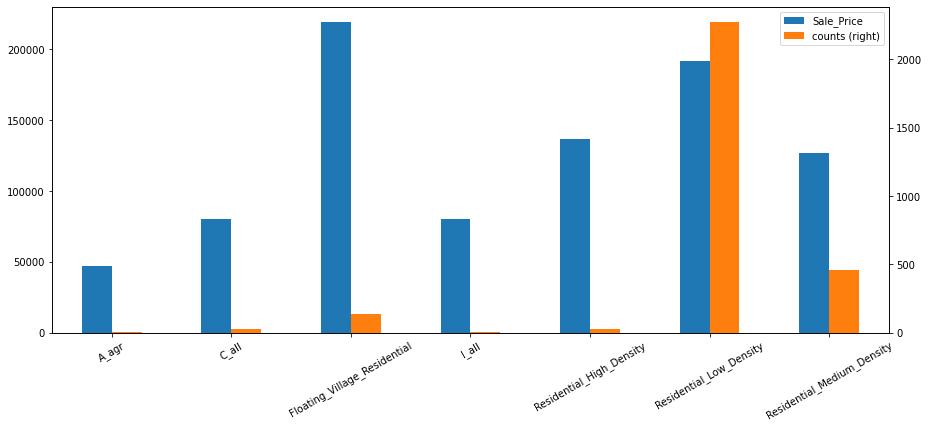

,MS_Zoning,Sale_Price,counts
0,A_agr,47300.000000,2
1,C_all,79795.040000,25
2,Floating_Village_Residential,218986.949640,139
3,I_all,80312.500000,2
4,Residential_High_Density,136419.777778,27
5,Residential_Low_Density,191283.251650,2273
6,Residential_Medium_Density,126781.393939,462


In [18]:
descriptive_analysis('MS_Zoning',ames_python)

One can notice already the wide range of Sales Prices according the selected variables. It is also interesting to notice the unequal distribution of the observations between the different categories.

### 3.4 Split Training/Test set <a name="three-one"></a>

Before adjusting the linear model, we create a training/test split in stratified way with respect to the target variable. In order to do so we apply the procedure ```Cut``` and ```train_test_split``` that were introduced during the first sessions.

First, we categorize the response variable *Sales_Price* into 20 bins. We create the bins using the ```linspace``` function from the *numpy* package and we then feed those bins to the ```cut``` function from the *panda* package which will categorize the *Sales_Price* according to the bins.

Once this is done we use the ```train_test_split``` function from *sklearn* to create a training and test set using stratified sampling according to the ```y_cat``` variable. We choose to build a training set which corresponds to 70% of the initial dataset. Because we do the sampling in a stratified way it means that we will perform the 70%-30% separately in each category of ```y_cat```. It means that the distribution of ```y_cat``` over the full dataset will be preserved in the training and test sets.


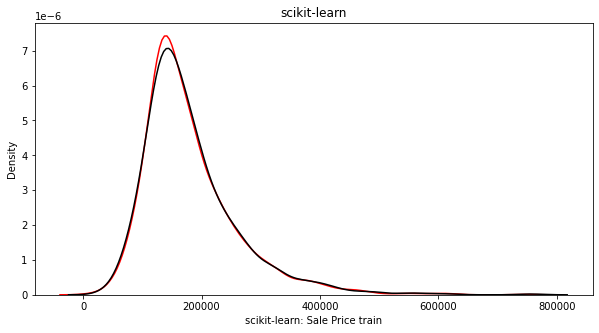

In [19]:
np.random.seed(123)

bins = np.linspace(ames_python.Sale_Price.min(),ames_python.Sale_Price.max(), 20 ) 
y_cat = pd.cut(ames_python.Sale_Price,bins=bins,include_lowest=True) 
ames_python_X = ames_python.drop(labels=['Sale_Price'], axis=1) 
ames_python_X_train, ames_python_X_test, ames_python_y_train, ames_python_y_test = train_test_split(ames_python_X,ames_python.Sale_Price, test_size=0.3, stratify=y_cat)

ames_python_train=ames_python_X_train
ames_python_train["Sale_Price"]=ames_python_y_train

ames_python_test=ames_python_X_test
ames_python_test["Sale_Price"]=ames_python_y_test

#create dataframe from different vector lengths

df1 = pd.DataFrame(ames_python_y_train)
df2= pd.DataFrame(ames_python_y_test)
plot_pd = pd.concat([df1,df2], ignore_index=True, axis=1)

#rename columns for x-label
plot_pd.columns = ['scikit-learn: Sale Price train', 'scikit-learn: Sale Price test']

#plot 

fig, axs = plt.subplots(ncols=1, figsize=(10,5));
sb.kdeplot(plot_pd['scikit-learn: Sale Price train'], ax = axs, color='r').set(title='scikit-learn');
sb.kdeplot(plot_pd['scikit-learn: Sale Price test'], ax = axs, color='k');
plt.show()

In [20]:
ames_python_train.head()

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,...,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Longitude,Latitude,Sale_Price
1988,1989,One_Story_1945_and_Older,Residential_Medium_Density,60,8520,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Old_Town,Norm,Norm,OneFam,One_Story,Average,Above_Average,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,Good,Typical,CBlock,Typical,Typical,No,Unf,7,Unf,0,968,968,GasA,...,SBrkr,968,0,0,968,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Detchd,Unf,2,480,Fair,Typical,Dirt_Gravel,0,0,184,0,0,0,No_Pool,No_Fence,None,0,7,2007,WD,Normal,-93.606789,42.030311,100000
2521,2522,One_Story_PUD_1946_and_Newer,Residential_Low_Density,40,3876,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Greens,Norm,Norm,Twnhs,One_Story,Very_Good,Average,1978,1978,Gable,CompShg,Wd Sdng,Plywood,None,0,Good,Typical,CBlock,Good,Typical,Gd,GLQ,3,Rec,526,48,1226,GasA,...,SBrkr,1226,0,0,1226,1,0,1,0,1,1,Good,4,Typ,1,Typical,Attchd,Fin,2,484,Typical,Typical,Paved,133,60,0,0,0,0,No_Pool,No_Fence,None,0,7,2006,WD,Normal,-93.649329,42.043351,170000
463,464,Two_Story_PUD_1946_and_Newer,Residential_Low_Density,36,2268,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Northridge_Heights,Norm,Norm,Twnhs,Two_Story,Good,Average,2003,2004,Gable,CompShg,VinylSd,Wd Shng,Stone,106,Good,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,197,764,GasA,...,SBrkr,764,862,0,1626,0,0,2,0,2,1,Good,6,Typ,0,No_Fireplace,BuiltIn,RFn,2,474,Typical,Typical,Paved,0,27,0,0,0,0,No_Pool,No_Fence,None,0,7,2009,WD,Normal,-93.650238,42.057467,173000
2067,2068,One_and_Half_Story_Finished_All_Ages,Residential_Low_Density,70,6960,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,OneFam,One_and_Half_Fin,Good,Very_Good,1940,1998,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,Typical,Typical,BrkTil,Typical,Typical,No,ALQ,1,Unf,0,422,680,GasA,...,FuseA,798,504,0,1302,0,0,1,1,2,1,Good,6,Typ,2,Good,Attchd,Unf,1,224,Typical,Typical,Paved,0,0,0,0,126,0,No_Pool,Minimum_Privacy,None,0,7,2007,WD,Normal,-93.660691,42.032638,165250
482,483,One_Story_PUD_1946_and_Newer,Residential_Low_Density,34,5063,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Northridge_Heights,Norm,Norm,Twnhs,One_Story,Good,Average,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,166,Good,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,410,1314,GasA,...,SBrkr,1314,0,0,1314,1,0,2,0,2,1,Good,6,Typ,1,Good,Attchd,RFn,2,626,Typical,Typical,Paved,172,62,0,0,0,0,No_Pool,No_Fence,None,0,4,2009,ConLw,Normal,-93.649649,42.058368,207500


### 3.5 Model training <a name="three-two"></a>

### 3.5.1 Initial fit <a name="three-two"></a>

We can fit the linear model by using the ```ols()``` funtion of the *statsmodel* package

In [21]:
LM_model_0 = sm.formula.ols("Sale_Price ~ MS_Zoning + Exter_Qual + Street + Lot_Area",data = ames_python_train)
LM_model_0_result=LM_model_0.fit()


We can have an overview of the model using the ```summary()``` function : 

In [22]:
print(LM_model_0_result.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     251.1
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:06:51   Log-Likelihood:                -25173.
No. Observations:                2051   AIC:                         5.037e+04
Df Residuals:                    2039   BIC:                         5.044e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In this summary you find global indicators on the fit quality (**R squarred**, **AIC**, **BIC**,...) as well as the the following information for each parameter :

- **coef** : the estimated parameter
- **std err** : the standard error around the estimated parameter
- **t** : the value of the test statistics for the hypothese that the parameter has no effect ($H_0 : \beta_j = 0$)
- **P >|t|** : the p-value of the test statistics for the hypothese that the parameter has no effect ($H_0 : \beta_j = 0$)
- **[0.025 0.975]** : the 95% confidence interval around the estimated parameter

You can access to specific information (already shown or not in the summary) by calling specific methods on the fitted model. The available methods can be displayed as follow using the ```dir``` funtion: 

In [23]:
dir(LM_model_0_result)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


The AIC value is therefore accessible with the following instruction (already shown in the summary) : 

In [24]:
LM_model_0_result.aic

50370.69648700156

The linear model parameters are accessible with the following instruction (already shown in the summary) : 

In [25]:
LM_model_0_result.params

Intercept                                    182050.627718
MS_Zoning[T.C_all]                            57439.324709
MS_Zoning[T.Floating_Village_Residential]    112822.817953
MS_Zoning[T.I_all]                            21495.385152
MS_Zoning[T.Residential_High_Density]         93968.602876
MS_Zoning[T.Residential_Low_Density]         119902.512925
MS_Zoning[T.Residential_Medium_Density]       90425.330396
Exter_Qual[T.Fair]                          -235569.264331
Exter_Qual[T.Good]                          -131804.192355
Exter_Qual[T.Typical]                       -214758.158019
Street[T.Pave]                                43537.291027
Lot_Area                                          2.045459
dtype: float64

The p-value of the test statistics for the hypothese that the parameter has no effect ($H_0 : \beta_j = 0$) can be extracted using the following instruction (already shown in the summary) : 

In [26]:
LM_model_0_result.pvalues

Intercept                                     2.576960e-05
MS_Zoning[T.C_all]                            1.415078e-01
MS_Zoning[T.Floating_Village_Residential]     2.721495e-03
MS_Zoning[T.I_all]                            6.837965e-01
MS_Zoning[T.Residential_High_Density]         1.502558e-02
MS_Zoning[T.Residential_Low_Density]          1.271504e-03
MS_Zoning[T.Residential_Medium_Density]       1.529212e-02
Exter_Qual[T.Fair]                            2.455962e-80
Exter_Qual[T.Good]                            1.104843e-86
Exter_Qual[T.Typical]                        1.146355e-205
Street[T.Pave]                                2.243511e-02
Lot_Area                                      1.121669e-35
dtype: float64

By looking the categories which are not listed explicitely we can deduce that the reference class is defined as
- **MS_Zoning** = A_agr
- **Exter_Qual** = Excellent
- **Street** = Gravel

In this segment the effect of the categorical variables are included in the intercept.



We can impose for each variable the class which will belong in the intercept. in order to do so, one can use the function ```Treatment``` We choose to put the most frequent categories in the reference class : 

In [27]:
LM_model_0 = sm.formula.ols("Sale_Price ~ C(MS_Zoning, Treatment('Residential_Low_Density')) + C(Exter_Qual, Treatment('Typical')) + C(Street, Treatment('Pave'))+ Lot_Area",data = ames_python_train)
LM_model_0_result=LM_model_0.fit()
print(LM_model_0_result.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     251.1
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:07:10   Log-Likelihood:                -25173.
No. Observations:                2051   AIC:                         5.037e+04
Df Residuals:                    2039   BIC:                         5.044e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

Using the **coef** column printed with the ```summary()``` function or using the ```.params``` attribute of the model we can easily compute the prediction of the model for a given profile. 

For instance let us compute the prediction for the following profile : 

- **MS_Zoning** = Residential_High_Density
- **Exter_Qual** = Fair
- **Street** = Grvl
- **Lot_Area** = 1000




The fitted parameters are the following : 

In [28]:
LM_model_0_result.params

Intercept                                                                             130732.273652
C(MS_Zoning, Treatment('Residential_Low_Density'))[T.A_agr]                          -119902.512926
C(MS_Zoning, Treatment('Residential_Low_Density'))[T.C_all]                           -62463.188216
C(MS_Zoning, Treatment('Residential_Low_Density'))[T.Floating_Village_Residential]     -7079.694972
C(MS_Zoning, Treatment('Residential_Low_Density'))[T.I_all]                           -98407.127773
C(MS_Zoning, Treatment('Residential_Low_Density'))[T.Residential_High_Density]        -25933.910049
C(MS_Zoning, Treatment('Residential_Low_Density'))[T.Residential_Medium_Density]      -29477.182529
C(Exter_Qual, Treatment('Typical'))[T.Excellent]                                      214758.158019
C(Exter_Qual, Treatment('Typical'))[T.Fair]                                           -20811.106312
C(Exter_Qual, Treatment('Typical'))[T.Good]                                            82953.965664


We then simply have to add the following effects : 

- **Intercept effect** : 130 732.273652
- **MS_Zoning effect when = Residential_High_Density** : -25 933.910049 
- **Exter_Qual effect when = Fair** : -20 811.106312
- **Street effect when = Grvl** : -43 537.291028
- **Lot_Area effect when area = 1000** : 2.045459*1000 = 2 045.459

This can be done easily : 

In [29]:
LM_model_0_result.params[LM_model_0_result.params.index == "Intercept"].values + \
LM_model_0_result.params[LM_model_0_result.params.index == "C(MS_Zoning, Treatment('Residential_Low_Density'))[T.Residential_High_Density]"].values + \
LM_model_0_result.params[LM_model_0_result.params.index == "C(Exter_Qual, Treatment('Typical'))[T.Fair]"].values + \
LM_model_0_result.params[LM_model_0_result.params.index == "C(Street, Treatment('Pave'))[T.Grvl]"].values + \
LM_model_0_result.params[LM_model_0_result.params.index == "Lot_Area"].values *1000


array([42495.4256353])

The predicted price is 42 495 euros

We can also obtain the prediction on this specific profile by applying the ```predict()``` method of the model on a dataframe containing this profile

In [30]:
profile=pd.DataFrame({
'MS_Zoning' : ["Residential_High_Density"],
    'Exter_Qual' : ["Fair"],
    'Street' : ["Grvl"],
    'Lot_Area' : [1000]
    })
profile

,MS_Zoning,Exter_Qual,Street,Lot_Area
0,Residential_High_Density,Fair,Grvl,1000


One can then submit this dataframe (containing a unique row) to the ```predict()``` function to get the predicted price which confirms our previous calculation. Usually, the ```predict()``` function is applied on the entire database in order to get a prediction for the entire sample.

In [31]:
profile["prediction"]=LM_model_0_result.predict(profile)
profile

,MS_Zoning,Exter_Qual,Street,Lot_Area,prediction
0,Residential_High_Density,Fair,Grvl,1000,42495.425635


### 3.5.2 Optimisation <a name="three-two"></a>

Once the model has been trained with the initial set of variables we can try to simplify it by removing variables and gathering categories.

Usually, the strategy is the following : 

- First we look at which variables can be removed as a whole
- Then we look at the gatherings that can be done between the categories of the remaining variables
    - For non ordered variables : we test the gathering of each class with the reference class
    - For ordered variables : we test adjacent gatherings
 
Each time, only one variabe can be removed at a time or a single gathering performed. Indeed, a non significant variable can become significant once another variable is removed from the model (if there were correlated).


We can also look at the significance of each variable $x$ by looking at the p-values of the Wald test : 

$$ H_0 : \beta_{x}(j)=0 \mbox{ } \forall j \mbox{ (= the true effect is zero for all parameters of the variables)}$$

If the p-value is > 5% we consider that the estimated coefficients for the variable are not large enoughs (in total as we look at the total effect of the variable) to reject the hypothese that the true effect of the variable is zero.

For instance, for the variable Street the test is the following : 

$$ H_0 : \beta_{Street}(Street=Pave)=\beta_{Street}(Street=Grvl)=0 $$

In [32]:
LM_model_0_result.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                                                              F            P>F  df constraint  df denom
Intercept                                           2901.765227   0.000000e+00              1    2039.0
C(MS_Zoning, Treatment('Residential_Low_Density'))    18.796921   2.159776e-21              6    2039.0
C(Exter_Qual, Treatment('Typical'))                  635.471144  1.360307e-291              3    2039.0
C(Street, Treatment('Pave'))                           5.219669   2.243511e-02              1    2039.0
Lot_Area                                             161.560086   1.121669e-35              1    2039.0

We see that no variables can be removed as a whole.

We can also look at the significance of each parameter individually by looking at the p-values associated to the following test : 

$$ H_0 : \beta_j=0 \mbox{ (= the true effect is zero)}$$

If the p-value is > 5% we consider that the estimated coefficient is not large enough to reject the hypothese that the true effect is zero.

In [33]:
LM_model_0_result.pvalues

Intercept                                                                              0.000000e+00
C(MS_Zoning, Treatment('Residential_Low_Density'))[T.A_agr]                            1.271504e-03
C(MS_Zoning, Treatment('Residential_Low_Density'))[T.C_all]                            1.444674e-06
C(MS_Zoning, Treatment('Residential_Low_Density'))[T.Floating_Village_Residential]     1.977196e-01
C(MS_Zoning, Treatment('Residential_Low_Density'))[T.I_all]                            9.936342e-03
C(MS_Zoning, Treatment('Residential_Low_Density'))[T.Residential_High_Density]         1.806373e-02
C(MS_Zoning, Treatment('Residential_Low_Density'))[T.Residential_Medium_Density]       8.524955e-19
C(Exter_Qual, Treatment('Typical'))[T.Excellent]                                      1.146355e-205
C(Exter_Qual, Treatment('Typical'))[T.Fair]                                            4.123785e-02
C(Exter_Qual, Treatment('Typical'))[T.Good]                                           4.276065e-179


In [34]:
LM_model_0_result.pvalues.max()

0.19771959206201115

We see here that the only non significant category is the Floating_Village_Residential category of the MS_Zoning variable. It suggests we could gather this category with the reference class. It is quite intuitive when we look at the mean Sales price and exposition along the MS_Zoning variable : 


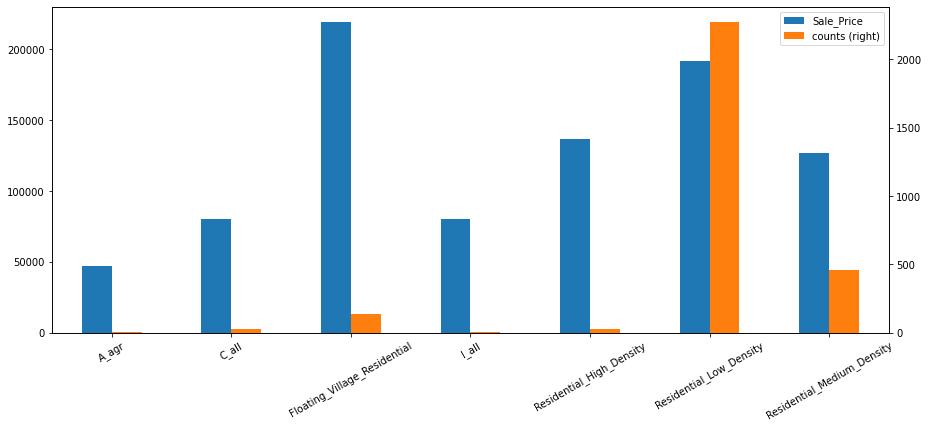

,MS_Zoning,Sale_Price,counts
0,A_agr,47300.000000,2
1,C_all,79795.040000,25
2,Floating_Village_Residential,218986.949640,139
3,I_all,80312.500000,2
4,Residential_High_Density,136419.777778,27
5,Residential_Low_Density,191283.251650,2273
6,Residential_Medium_Density,126781.393939,462


In [35]:
descriptive_analysis("MS_Zoning",ames_python)

We indeed see that the category Floating village residential is very poorly represented and has an observed mean Sales Price quite close to the one observed on the the Residential_Low_Density. It induces that the model can't differentiate those 2 classes with enough certainty.

Let us then gather the Floating village residential modality with the intercept : 

In [36]:
ames_python_train['MS_Zoning_2'] = ames_python_train['MS_Zoning'].astype('object')
ames_python_train.loc[ames_python_train['MS_Zoning'].isin(["Floating_Village_Residential","Residential_Low_Density"]),'MS_Zoning_2']="Residential_Low_Density_Floating"
ames_python_train['MS_Zoning_2']=ames_python_train['MS_Zoning_2'].astype('category')
print(ames_python_train.MS_Zoning.value_counts())
print("")
print(ames_python_train.MS_Zoning_2.value_counts())


ames_python_test['MS_Zoning_2'] = ames_python_test['MS_Zoning'].astype('object')
ames_python_test.loc[ames_python_test['MS_Zoning'].isin(["Floating_Village_Residential","Residential_Low_Density"]),'MS_Zoning_2']="Residential_Low_Density_Floating"
ames_python_test['MS_Zoning_2']=ames_python_test['MS_Zoning_2'].astype('category')
print(ames_python_test.MS_Zoning.value_counts())
print("")
print(ames_python_test.MS_Zoning_2.value_counts())

Residential_Low_Density         1566
Residential_Medium_Density       335
Floating_Village_Residential     105
Residential_High_Density          23
C_all                             18
I_all                              2
A_agr                              2
Name: MS_Zoning, dtype: int64

Residential_Low_Density_Floating    1671
Residential_Medium_Density           335
Residential_High_Density              23
C_all                                 18
I_all                                  2
A_agr                                  2
Name: MS_Zoning_2, dtype: int64
Residential_Low_Density         707
Residential_Medium_Density      127
Floating_Village_Residential     34
C_all                             7
Residential_High_Density          4
I_all                             0
A_agr                             0
Name: MS_Zoning, dtype: int64

Residential_Low_Density_Floating    741
Residential_Medium_Density          127
C_all                                 7
Residential_High_Density     

We can refit the model using the new clustered variables and recheck the p-values : 

In [37]:
LM_model_1 = sm.formula.ols("Sale_Price ~ C(MS_Zoning_2, Treatment('Residential_Low_Density_Floating')) + C(Exter_Qual, Treatment('Typical')) + C(Street, Treatment('Pave'))+ Lot_Area",data = ames_python_train)
LM_model_1_result=LM_model_1.fit()

In [38]:
LM_model_1_result.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                                                                         F            P>F  df constraint  df denom
Intercept                                                      2927.574281   0.000000e+00              1    2040.0
C(MS_Zoning_2, Treatment('Residential_Low_Density_Floating'))    22.217070   9.620539e-22              5    2040.0
C(Exter_Qual, Treatment('Typical'))                             653.291657  1.372945e-297              3    2040.0
C(Street, Treatment('Pave'))                                      5.350524   2.081507e-02              1    2040.0
Lot_Area                                                        168.900876   3.679856e-37              1    2040.0

In [39]:
LM_model_1_result.pvalues

Intercept                                                                                       0.000000e+00
C(MS_Zoning_2, Treatment('Residential_Low_Density_Floating'))[T.A_agr]                          1.242246e-03
C(MS_Zoning_2, Treatment('Residential_Low_Density_Floating'))[T.C_all]                          1.612520e-06
C(MS_Zoning_2, Treatment('Residential_Low_Density_Floating'))[T.I_all]                          9.614341e-03
C(MS_Zoning_2, Treatment('Residential_Low_Density_Floating'))[T.Residential_High_Density]       1.974962e-02
C(MS_Zoning_2, Treatment('Residential_Low_Density_Floating'))[T.Residential_Medium_Density]     1.625654e-18
C(Exter_Qual, Treatment('Typical'))[T.Excellent]                                               2.090716e-205
C(Exter_Qual, Treatment('Typical'))[T.Fair]                                                     4.155793e-02
C(Exter_Qual, Treatment('Typical'))[T.Good]                                                    3.907881e-187
C(Street, Treatment

We see that the gathering did not induce a change in significance in the variables or in the individual categories

We can compare the predictions on the test set : 

In [40]:
ames_python_test
pred_0=LM_model_0_result.predict(ames_python_X_test)
pred_1=LM_model_1_result.predict(ames_python_X_test)



print(math.sqrt(mean_squared_error(ames_python_test["Sale_Price"],pred_0))/ames_python_test["Sale_Price"].mean())
print(math.sqrt(mean_squared_error(ames_python_test["Sale_Price"],pred_1))/ames_python_test["Sale_Price"].mean())

0.29065500130755373
0.2907423962349138


We cannot say the gathering really improve the prediction performance of the model. Nevertheless simplifying the model allows to avoid overfitting and improve its robustness. 

# Chapter 4 - GLM on the frequency <a name="four"></a>

We will model the frequency of the MTPL database based on the following :variables
- FUEL
- FLEET
- SEX
- AGEPH

In [41]:
mtpl_python.head()

,ID,NCLAIMS,AMOUNT,AVG,EXP,COVERAGE,FUEL,USE,FLEET,SEX,AGEPH,BM,AGEC,POWER,PC,TOWN,LONG,LAT
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,50,5,12,77,1000,BRUSSEL,4.355223,50.845386
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,28,9,7,70,1000,BRUSSEL,4.355223,50.845386


We check the type of the variables of interest in the dataset

In [42]:
print("MTPL_Python")
mtpl_python[["FUEL","FLEET","SEX","AGEPH"]].info()

MTPL_Python
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163231 entries, 0 to 163230
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   FUEL    163231 non-null  object
 1   FLEET   163231 non-null  object
 2   SEX     163231 non-null  object
 3   AGEPH   163231 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


We convert the object types into category

In [43]:
for c in ["FUEL","FLEET","SEX"]:
    mtpl_python[c]=pd.Categorical(mtpl_python[c])
    

In [44]:
print("MTPL_Python")
mtpl_python[["FUEL","FLEET","SEX","AGEPH"]].info()

MTPL_Python
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163231 entries, 0 to 163230
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   FUEL    163231 non-null  category
 1   FLEET   163231 non-null  category
 2   SEX     163231 non-null  category
 3   AGEPH   163231 non-null  int64   
dtypes: category(3), int64(1)
memory usage: 1.7 MB


Before adjusting the linear model, we create a training/test split in stratified way with respect to the target variable ```NCLAIMS```. In order to do so we apply  ```train_test_split``` that was introduced previously.

Once this is done we use the ```train_test_split``` function from *sklearn* to create a training and test set using stratified sampling according to the ```y_cat``` variable. We choose to build a training set which corresponds to 80% of the initial dataset. Because we do the sampling in a stratified way it means that we will perform the 80%-20% separately for each frequency level ```NCLAIMS```. It means that the distribution of ```NCLAIMS``` over the full dataset will be preserved in the training and test sets.


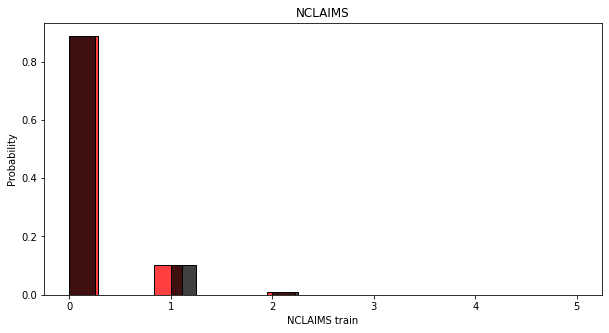

In [45]:
np.random.seed(123)

mtpl_python_X = mtpl_python.drop(labels=['NCLAIMS'], axis=1) 
mtpl_python_X_train, mtpl_python_X_test, mtpl_python_y_train, mtpl_python_y_test = train_test_split(mtpl_python_X,mtpl_python.NCLAIMS, test_size=0.2, stratify=mtpl_python.NCLAIMS)


mtpl_python_train=mtpl_python_X_train
mtpl_python_train["NCLAIMS"]=mtpl_python_y_train

mtpl_python_test=mtpl_python_X_test
mtpl_python_test["NCLAIMS"]=mtpl_python_y_test


df = pd.DataFrame(mtpl_python_y_train)
df1 = pd.DataFrame(mtpl_python_y_test)

plot_pd = pd.concat([df,df1], ignore_index=True, axis=1)

#rename columns for x-label
plot_pd.columns = ['NCLAIMS train', 'NCLAIMS test']

#plot 

fig, axs = plt.subplots(ncols=1, figsize=(10,5));
sb.histplot(plot_pd ['NCLAIMS train'], ax = axs, color='r',stat="probability").set(title='NCLAIMS');
sb.histplot(plot_pd['NCLAIMS test'], ax = axs, color='k',stat="probability");
plt.show()

To better understand the model outcomes, before adjusting the model, we analyse the observed frequency according to some key features. In order to do so, we define a ```description_analysis2``` function :

In [ ]:
def description_analysis2(variable,data):
    
    Nbr = data[['NCLAIMS']].groupby([data[variable]]).sum().reset_index()
    exp = data[['EXP']].groupby([data[variable]]).sum().reset_index()
    charge = data[['AMOUNT']].groupby([data[variable]]).sum().reset_index()
    obs = pd.merge(Nbr,exp)
    obs = pd.merge(obs,charge)
    obs['Freq']=obs['NCLAIMS']/obs['EXP']
    obs['AVG']=obs['AMOUNT']/obs['NCLAIMS']
    
    table=obs
    
    plt.rcParams['figure.figsize'] = [20, 6]
    table_to_plot=table.loc[:,[variable,'EXP','Freq']]
    table_to_plot[variable]=table_to_plot[variable].astype("category")
    table_to_plot.plot(kind='bar', secondary_y='EXP', rot=30)
    plt.xticks(range(table_to_plot.shape[0]),list(table_to_plot.iloc[:,0]), rotation=30)
    plot=plt.show()
    
    return(obs)

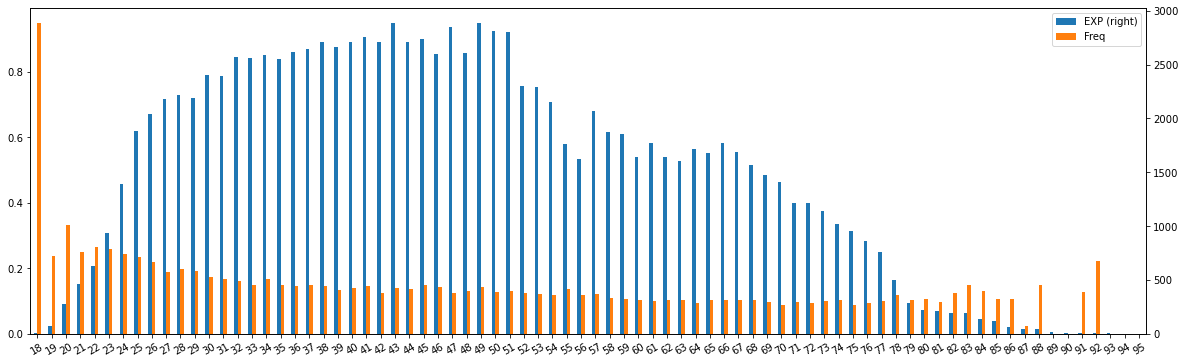

,AGEPH,NCLAIMS,EXP,AMOUNT,Freq,AVG
0,18,3,3.164384,1306.795505,0.948052,435.598502
1,19,17,71.671233,35976.836829,0.237194,2116.284519
2,20,93,280.684932,131440.385326,0.331332,1413.337477
3,21,116,465.687671,524992.327695,0.249094,4525.795928
4,22,166,629.065753,252496.287794,0.263883,1521.061975
...,...,...,...,...,...,...
73,91,1,7.827397,1471.793435,0.127756,1471.793435
74,92,1,4.526027,1426.379342,0.220944,1426.379342
75,93,0,4.046575,0.000000,0.000000,NaN
76,94,0,2.000000,0.000000,0.000000,NaN


In [ ]:
description_analysis2("AGEPH",mtpl_python_train)

One can see the evolution of the claims frequency according to age strating from Age 18 to Age 95 : 

*   high frequency for young drivers and older drivers
*   low frequency for Age between 40 and 60.


In oder to use the ```AGEPH``` variable in or GLM, we first define age categories. Such a categorisation of the ```AGEPH``` variable is necessary otherwise, the GLM model can only capture an exponential relation between ```AGEPH``` and the claim frequency.

In [46]:
mtpl_python_train["AGEPH2"] = np.where(mtpl_python_train['AGEPH'] < 21, "18-20", np.where(mtpl_python_train['AGEPH'] <26 ,"21-25", \
                              np.where(mtpl_python_train['AGEPH'] < 31, "26-30", np.where(mtpl_python_train['AGEPH'] < 41, "31-40", \
                              np.where(mtpl_python_train['AGEPH'] < 51, "41-50", np.where(mtpl_python_train['AGEPH'] < 61, "51-60", \
                              np.where(mtpl_python_train['AGEPH'] < 71, "61-70", \
                              np.where(mtpl_python_train['AGEPH'] < 81, "71-80",">80"))))))))

In [ ]:
mtpl_python_train.AGEPH.value_counts()

43    3260
49    3218
47    3188
41    3150
50    3136
      ... 
91       8
92       5
93       5
94       2
95       1
Name: AGEPH, Length: 78, dtype: int64

We check that the categorisation steps went well.

In [ ]:
mtpl_python_train.AGEPH2.value_counts()

41-50    31037
31-40    30039
51-60    22617
61-70    17663
26-30    12802
71-80     8683
21-25     6173
>80       1147
18-20      423
Name: AGEPH2, dtype: int64

We then analyse the observed frequency according the feature ```FLEET```

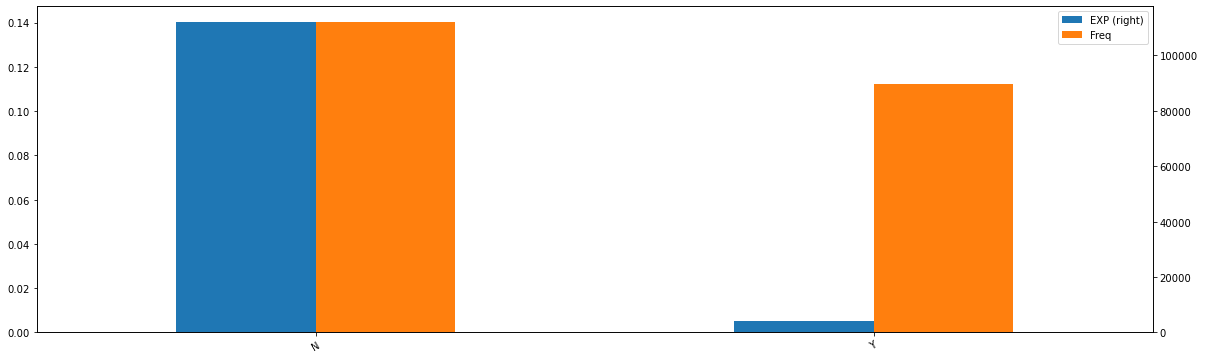

,FLEET,NCLAIMS,EXP,AMOUNT,Freq,AVG
0,N,15741,112158.052055,2.380137e+07,0.140347,1512.062306
1,Y,449,4004.586301,5.222845e+05,0.112121,1163.217232


In [ ]:
description_analysis2("FLEET",mtpl_python_train)

One can notice the limited fleet exposure in this portfolio.

We can then fit the genealised linear model (GLM) using the following function coming from the *statmodel* package :


*  ```formula.glm``` : definition of the model object (formula, database, distribution of the response variable, ...)
*  ```fit``` : model adjustment
*  ```summary``` : print of the main model outcome (coefficients, standard deviation, p-value)

Outcomes produces from GLMs procedures are very similar to the ones obtained previously with linear model procedures. 

In [48]:
mtpl_python_train['LogRiskExp']=np.log(mtpl_python_train['EXP'])

GLM_model_0_formula = sm.formula.glm("NCLAIMS ~ C(FLEET, Treatment('N')) + C(FUEL, Treatment('gasoline')) + C(SEX, Treatment('male')) + C(AGEPH2, Treatment('41-50'))", \
                              data = mtpl_python_train,family=sm.families.Poisson(link=sm.families.links.log), \
                              offset = mtpl_python_train['LogRiskExp'])

GLM_model_0_result = GLM_model_0_formula.fit()
print(GLM_model_0_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                NCLAIMS   No. Observations:               130584
Model:                            GLM   Df Residuals:                   130572
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50524.
Date:                Tue, 26 Oct 2021   Deviance:                       70863.
Time:                        09:39:58   Pearson chi2:                 1.57e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [49]:
GLM_model_0_result.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                                        chi2         P>chi2  df constraint
Intercept                       12339.050549   0.000000e+00              1
C(FLEET, Treatment('N'))            9.295950   2.296610e-03              1
C(FUEL, Treatment('gasoline'))     81.130621   2.112807e-19              1
C(SEX, Treatment('male'))           3.706282   5.420801e-02              1
C(AGEPH2, Treatment('41-50'))     978.099406  7.961358e-206              8

Looking at the p-value of the this statistical test, one can conclude that we should probably remove the ```sex``` variable from our first model. 

In [50]:
GLM_model_1_formula = sm.formula.glm("NCLAIMS ~ C(FLEET, Treatment('N')) + C(FUEL, Treatment('gasoline')) + C(AGEPH2, Treatment('41-50'))", \
                              data = mtpl_python_train,family=sm.families.Poisson(link=sm.families.links.log), \
                              offset = mtpl_python_train['LogRiskExp'])
GLM_model_1_result = GLM_model_1_formula.fit()

GLM_model_1_result.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                                        chi2         P>chi2  df constraint
Intercept                       13548.047543   0.000000e+00              1
C(FLEET, Treatment('N'))            9.031439   2.653755e-03              1
C(FUEL, Treatment('gasoline'))     78.009985   1.025210e-18              1
C(AGEPH2, Treatment('41-50'))    1014.187460  1.293232e-213              8

All the variables are significant.

Let us check if some gatherings between categories of the ```AGEPH2``` variable are statistically justified : 

In [ ]:
GLM_model_1_result.pvalues

Intercept                                   0.000000e+00
C(FLEET, Treatment('N'))[T.Y]               2.653755e-03
C(FUEL, Treatment('gasoline'))[T.diesel]    1.025210e-18
C(AGEPH2, Treatment('41-50'))[T.18-20]      1.446108e-19
C(AGEPH2, Treatment('41-50'))[T.21-25]      6.561971e-75
C(AGEPH2, Treatment('41-50'))[T.26-30]      3.335320e-37
C(AGEPH2, Treatment('41-50'))[T.31-40]      6.924970e-05
C(AGEPH2, Treatment('41-50'))[T.51-60]      7.276773e-07
C(AGEPH2, Treatment('41-50'))[T.61-70]      5.498773e-23
C(AGEPH2, Treatment('41-50'))[T.71-80]      9.294616e-14
C(AGEPH2, Treatment('41-50'))[T.>80]        1.621479e-01
dtype: float64

Preivous outcomes already suggested that the modality >80 could be merged to the reference class [41-50]. But from a commercial point of view it has little sense. Because the variable is ordonate we will rather check adjacent gatherings.

We will define the test statistics corresponding to the test

$$ H_0 : \beta_{x}(i) = \beta_{x}(j) $$

We will compute the test statistics for all pair $(i,j)$ but only consider adjacent pairs. In order to do so we define a ```Wald_hypothesis()``` function :

In [51]:
def Wald_hypothesis(model,variable):

    params=pd.DataFrame(model.params)
    params_var=params.loc[np.array([s for s in params.index if variable in s])]
    cov=model.cov_params()
    cov_var=cov.loc[np.array([s for s in cov.index if variable in s]),np.array([s for s in cov.columns if variable in s])]
     
    wald_matrix = np.array([[0.000 for j in range(len(params_var))] for i in range(len(params_var))])

    for i in range(len(params_var)):
        for j in range(len(params_var)):
            wald_matrix[i,j]=(params_var.iloc[i]-params_var.iloc[j])**2/(cov_var.iloc[i,i] - 2*cov_var.iloc[i,j] + cov_var.iloc[j,j])

    return(wald_matrix.round(3))



We apply this ```Wald_hypothesis()``` funtion to our model for the variable ```AGEPH2```

In [52]:
wald_table=Wald_hypothesis(GLM_model_1_result,'AGEPH2')
wald_table=pd.DataFrame(wald_table, 
             columns=['18-20', 
                      '21-25',
                      '26-30', 
                      '31-40', 
                      '51-60',
                      '61-70', 
                      '71-80',
                       '>80'])
wald_table['AGEPH2']=['18-20', 
                      '21-25',
                      '26-30', 
                      '31-40', 
                      '51-60',
                      '61-70', 
                      '71-80',
                       '>80']
wald_table.set_index('AGEPH2')

,18-20,21-25,26-30,31-40,51-60,61-70,71-80,>80
AGEPH2,,,,,,,,
18-20,NaN,7.878,28.858,65.611,106.446,141.684,132.256,57.285
21-25,7.878,NaN,47.921,241.923,436.891,561.587,381.288,56.222
26-30,28.858,47.921,NaN,89.319,255.656,374.892,233.538,25.422
31-40,65.611,241.923,89.319,NaN,72.366,168.621,95.925,5.634
51-60,106.446,436.891,255.656,72.366,NaN,26.457,15.846,0.000
61-70,141.684,561.587,374.892,168.621,26.457,NaN,0.002,2.960
71-80,132.256,381.288,233.538,95.925,15.846,0.002,NaN,2.698
>80,57.285,56.222,25.422,5.634,0.000,2.960,2.698,NaN


The output of our ```Wald_hypothesis()``` function is a table that show the test statistic of the Wald-test for the different potential gathering of ```AGEPH2```categories.

The value of 3.841 is the 95% quantile value of the test statistic, meaning that below this value the p-value is more than 5%. 

It means that the difference in the parameters between 2 classes is not high enough to reject the hypothese that the true effect of the two classes are the same. It means that we can gather the 2 classes if the test statistics is below 3.841.  

We see that the first gathering to perform is between [61-70] and [71-80]

In [53]:
mtpl_python_train['AGEPH3'] = mtpl_python_train['AGEPH2'].replace(['61-70','71-80'],'61-80')

In [54]:
GLM_model_2_formula = sm.formula.glm("NCLAIMS ~ C(FLEET, Treatment('N')) + C(FUEL, Treatment('gasoline')) + C(AGEPH3, Treatment('41-50'))", \
                              data = mtpl_python_train,family=sm.families.Poisson(link=sm.families.links.log), \
                              offset = mtpl_python_train['LogRiskExp'])
GLM_model_2_result = GLM_model_2_formula.fit()

GLM_model_2_result.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                                        chi2         P>chi2  df constraint
Intercept                       13551.418375   0.000000e+00              1
C(FLEET, Treatment('N'))            9.029193   2.657017e-03              1
C(FUEL, Treatment('gasoline'))     78.142772   9.585575e-19              1
C(AGEPH3, Treatment('41-50'))    1014.190191  1.034398e-214              7

In [55]:
GLM_model_2_result.pvalues

Intercept                                   0.000000e+00
C(FLEET, Treatment('N'))[T.Y]               2.657017e-03
C(FUEL, Treatment('gasoline'))[T.diesel]    9.585575e-19
C(AGEPH3, Treatment('41-50'))[T.18-20]      1.446761e-19
C(AGEPH3, Treatment('41-50'))[T.21-25]      6.563880e-75
C(AGEPH3, Treatment('41-50'))[T.26-30]      3.334371e-37
C(AGEPH3, Treatment('41-50'))[T.31-40]      6.924039e-05
C(AGEPH3, Treatment('41-50'))[T.51-60]      7.275211e-07
C(AGEPH3, Treatment('41-50'))[T.61-80]      4.704463e-29
C(AGEPH3, Treatment('41-50'))[T.>80]        1.621036e-01
dtype: float64

**Exercise : Do you think that the model still needed to be modified?** 